# FLARES: FINE-GRAINED LANGUAGE-BASED RELIABILITY DETECTION IN SPANISH NEWS

The task is divided into two subtasks:

- Subtask 1: 5W1Hs identification: Participants will be provided with a text, and they will have to determine the essential content of it by annotating the answers to the 5W1H questions of the document. To participate in this task please use the following Kaggle link: FLARES: Subtask 1 --5W1Hs identification--.

- Subtask 2: 5W1H-based reliability: For each 5W1H detected, participants will have to determine if the language used in each item is "confiable", "semiconfiable" or "no confiable", following the RUN-AS guideline. To participate in this task please use the following Kaggle link: FLARES: Subtask 2 --Reliability classification-- . 

## Substask 1

Task output
- Tag_Start: Start of the sentence
- Tag_end: Sentence end
- 5W1H_Label: Label to put to sentence [ WHAT, WHO, WHEN, WHERE, WHY, HOW]

WHAT (fact), WHO (subject), WHEN (time), WHERE (place), WHY (cause), and HOW (manner).

In [4]:
import pandas as pd

In [5]:
# Load the data
task1_train = pd.read_json('Flares-dataset/5w1h_subtarea_1_train.json', lines=True)
task1_test = pd.read_json('Flares-dataset/5w1h_subtask_1_trial.json', lines=True)

In [6]:
# Check the shape of the DataFrame
print("Shape of the DataFrame train:", task1_train.shape)
print("Shape of the DataFrame test:", task1_test.shape)

Shape of the DataFrame train: (1585, 3)
Shape of the DataFrame test: (168, 3)


In [7]:
task1_train.head()

,Id,Text,Tags
0,732,"Dos días, exactamente han pasado dos días desd...","[{'Tag_Start': 52, 'Tag_End': 59, '5W1H_Label'..."
1,219,"Pero no pasará nada, el PSOE no exigirá la dim...","[{'Tag_Start': 21, 'Tag_End': 28, '5W1H_Label'..."
2,559,Pero los investigadores no encontraron evidenc...,"[{'Tag_Start': 5, 'Tag_End': 23, '5W1H_Label':..."
3,1296,Sus otras dos cabezas más visibles han sido el...,"[{'Tag_Start': 22, 'Tag_End': 34, '5W1H_Label'..."
4,1229,"A modo de ejemplo, los hospitales privados lle...","[{'Tag_Start': 19, 'Tag_End': 42, '5W1H_Label'..."


In [8]:
task1_train['Id'][0]

732

In [9]:
task1_train['Text'][0]

'Dos días, exactamente han pasado dos días desde que Sánchez compareciera en rueda de prensa en la Moncloa afirmando que a España llegarían, entre abril y septiembre, un total de 87 millones de vacunas para darnos cuenta de que las mentiras de Sánchez hacen bueno ese refrán que dice que “la mentira tiene las patas muy cortas”.'

In [10]:
task1_train['Tags'][0][0]

{'Tag_Start': 52,
 'Tag_End': 59,
 '5W1H_Label': 'WHO',
 'Reliability_Label': 'confiable',
 'Tag_Text': 'Sánchez'}

Only take into account the first 3 items.

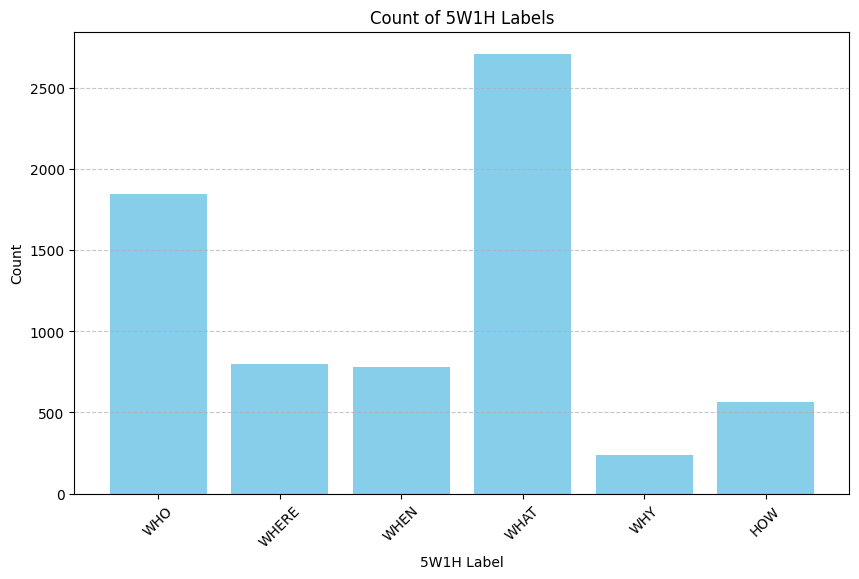

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming task1_train['tags'] is a list of lists of dictionaries
tags_list = task1_train['Tags']

# Flatten the list of lists into a single list of dictionaries
flat_tags = [tag for sublist in tags_list for tag in sublist]

# Extract 5W1H labels from the flattened list
labels = [tag['5W1H_Label'] for tag in flat_tags]

# Count occurrences of each label
label_counts = Counter(labels)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('5W1H Label')
plt.ylabel('Count')
plt.title('Count of 5W1H Labels')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid
plt.show()

In [37]:
# Total number of labels
total_labels = sum(label_counts.values())

# Calculating percentages for each label
label_percentages = {label: (count / total_labels) * 100 for label, count in label_counts.items()}

# Printing percentages
for label, percentage in label_percentages.items():
    print(f"{label}: {percentage:.2f}%")

WHO: 26.58%
WHERE: 11.55%
WHEN: 11.22%
WHAT: 39.10%
WHY: 3.43%
HOW: 8.12%


### Text labeling

Text labeling works by putting the position of the first letter in Tag_start and the last letter + 1 in Tag_end.

In [18]:
# Your text
text = task1_train['Text'][0]

In [19]:
# Loop through each tag in the first item of task1_train['Tags']
for tag in task1_train['Tags'][0]:
    # Extract the text based on Tag_Start and Tag_End
    extracted_text = text[tag['Tag_Start']:tag['Tag_End']]
    # Print the extracted text and the corresponding 5W1H label
    print(f"Extracted Text: {extracted_text}, 5W1H Label: {tag['5W1H_Label']}")

Extracted Text: Sánchez, 5W1H Label: WHO
Extracted Text: en rueda de prensa en la Moncloa, 5W1H Label: WHERE
Extracted Text: a España, 5W1H Label: WHO
Extracted Text: entre abril y septiembre, 5W1H Label: WHEN
Extracted Text: un total de 87 millones de vacunas, 5W1H Label: WHAT
Extracted Text: las mentiras, 5W1H Label: WHAT
Extracted Text: de Sánchez, 5W1H Label: WHO
Extracted Text: ese refrán que dice, 5W1H Label: WHAT


In [24]:
text[52]

'S'

In [25]:
text[59]

' '